In [58]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
single_value = x_train[1]

In [6]:
single_value

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [7]:
single_value.shape

(28, 28)

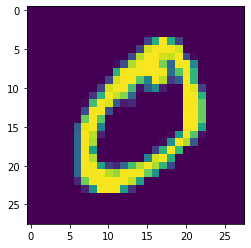

In [8]:
plt.imshow(single_value)

In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
#Pre-procssing

In [12]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train = to_categorical(y_train,10)

In [17]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [59]:
y_cat_test = to_categorical(y_test,10)

In [20]:
x_train = x_train/255
x_test = x_test/255

In [21]:
scaled_single = x_train[0]

In [22]:
scaled_single.max()

1.0

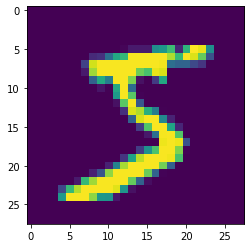

In [23]:
plt.imshow(scaled_single)

In [24]:
#Reshaping the data

In [28]:
x_test.shape

(10000, 28, 28)

In [30]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [38]:
x_train.shape

(60000, 28, 28, 1)

In [32]:
#creating the model for training the data

In [33]:
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D
from tensorflow.keras.models import Sequential

In [43]:
model = Sequential()

#CNN
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

#ANN
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

#Complie
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 9, 9, 32)          16416     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_5 (Dense)              (None, 10)               

In [48]:
model.fit(x_train,y_train,
          steps_per_epoch=int(60000/1),
          epochs=5)

Epoch 1/5
60000/60000 [==============================] - 218s 4ms/step - loss: 0.0654 - accuracy: 0.9811
Epoch 2/5
60000/60000 [==============================] - 217s 4ms/step - loss: 0.0564 - accuracy: 0.9856
Epoch 3/5
60000/60000 [==============================] - 208s 3ms/step - loss: 0.0511 - accuracy: 0.9876
Epoch 4/5
60000/60000 [==============================] - 221s 4ms/step - loss: 0.0493 - accuracy: 0.9884
Epoch 5/5
60000/60000 [==============================] - 215s 4ms/step - loss: 0.0503 - accuracy: 0.9887


In [49]:
from sklearn.metrics import confusion_matrix,classification_report

In [52]:
predictions = model.predict_classes(x_test)

In [57]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0704 - accuracy: 0.9847


[0.07042206078767776, 0.9847000241279602]

In [62]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       977
           1       0.99      0.98      0.99      1154
           2       0.96      1.00      0.98       999
           3       0.99      0.99      0.99      1003
           4       0.98      0.99      0.99       968
           5       0.99      0.99      0.99       893
           6       0.98      0.99      0.98       956
           7       0.99      0.97      0.98      1040
           8       0.99      0.98      0.98       985
           9       0.99      0.97      0.98      1025

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



Image label is:  0


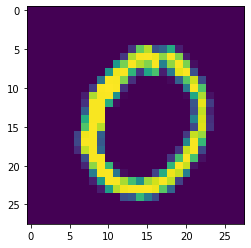

In [69]:
i = 101
print("Image label is: ", predictions[i])
plt.imshow(x_test[i][:,:])